# **Analysis of Nominated Grammy Albums of The Year Using Spotify Data 2025**

### Data Imports and Cleaning

In [1]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 8.4 MB/s eta 0:00:00


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_id = "0054a24f2fc643c69d56d020dd5f70be"
client_secret = "98b4a4b772ad4eca934a92ca60c246a0"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Albums Nominated this year for Album of the Year

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time
import numpy as np

# Spotify API credentials
client_id = "0054a24f2fc643c69d56d020dd5f70be"
client_secret = "98b4a4b772ad4eca934a92ca60c246a0"
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# List of artists and their nominated albums
artists_albums = {
    "André 3000": "New Blue Sun",
    "Beyoncé": "COWBOY CARTER",
    "Sabrina Carpenter": "Short n' Sweet",
    "Charli XCX": "BRAT",
    "Jacob Collier": "Djesse Vol. 4",
    "Billie Eilish": "HIT ME HARD AND SOFT",
    "Chappell Roan": "The Rise and Fall of a Midwest Princess",
    "Taylor Swift": "THE TORTURED POETS DEPARTMENT"
}

# Initialize list to store track data
track_data = []

for artist, album in artists_albums.items():
    # Search for the album
    results = sp.search(q=f"album:{album} artist:{artist}", type='album', limit=1)
    items = results['albums']['items']
    if items:
        album_id = items[0]['id']
        album_name = items[0]['name']
        # Get tracks from the album
        tracks = sp.album_tracks(album_id)
        for track in tracks['items']:
            track_id = track['id']
            track_name = track['name']
            # Get audio features
            features = sp.audio_features(track_id)[0]
            # Get track popularity
            popularity = sp.track(track_id)['popularity']
            # Compile track info
            track_info = {
                'artist': artist,
                'album': album_name,
                'track_name': track_name,
                'track_id': track_id,
                'popularity': popularity
            }
            if features:
                track_info.update(features)
            track_data.append(track_info)
        # Sleep to respect rate limits
        time.sleep(np.random.uniform(1, 2))
    else:
        print(f"Album '{album}' by '{artist}' not found.")

# Create DataFrame
df = pd.DataFrame(track_data)

# Display the DataFrame
print(df.head())

       artist         album  \
0  André 3000  New Blue Sun   
1  André 3000  New Blue Sun   
2  André 3000  New Blue Sun   
3  André 3000  New Blue Sun   
4  André 3000  New Blue Sun   

                                          track_name                track_id  \
0  I swear, I Really Wanted To Make A "Rap" Album...  1lbjDy6IIerHFGZWKG0hno   
1  The Slang Word P(*)ssy Rolls Off The Tongue Wi...  53JuszD36WgJTr4Rdq7kjO   
2  That Night In Hawaii When I Turned Into A Pant...  7763zdQtsUXNRKMDbahyK5   
3  BuyPoloDisorder's Daughter Wears A 3000® Shirt...  1D7g7ZejXNy4GdbDAPSg2i   
4             Ninety Three 'Til Infinity And Beyoncé  0LVCuBsPmGaYvGV3IOMXFy   

   popularity  danceability  energy  key  loudness  mode  ...  liveness  \
0          51         0.130  0.0986    6   -25.793     0  ...     0.130   
1          46         0.181  0.0392    1   -24.406     0  ...     0.286   
2          44         0.252  0.0467    0   -25.112     1  ...     0.112   
3          42         0.190  0.1

In [4]:
df

,artist,album,track_name,track_id,popularity,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,André 3000,New Blue Sun,"I swear, I Really Wanted To Make A ""Rap"" Album...",1lbjDy6IIerHFGZWKG0hno,51,0.130,0.0986,6,-25.793,0,...,0.1300,0.0904,87.797,audio_features,1lbjDy6IIerHFGZWKG0hno,spotify:track:1lbjDy6IIerHFGZWKG0hno,https://api.spotify.com/v1/tracks/1lbjDy6IIerH...,https://api.spotify.com/v1/audio-analysis/1lbj...,740011,3
1,André 3000,New Blue Sun,The Slang Word P(*)ssy Rolls Off The Tongue Wi...,53JuszD36WgJTr4Rdq7kjO,46,0.181,0.0392,1,-24.406,0,...,0.2860,0.0640,79.450,audio_features,53JuszD36WgJTr4Rdq7kjO,spotify:track:53JuszD36WgJTr4Rdq7kjO,https://api.spotify.com/v1/tracks/53JuszD36WgJ...,https://api.spotify.com/v1/audio-analysis/53Ju...,830545,3
2,André 3000,New Blue Sun,That Night In Hawaii When I Turned Into A Pant...,7763zdQtsUXNRKMDbahyK5,44,0.252,0.0467,0,-25.112,1,...,0.1120,0.0307,79.273,audio_features,7763zdQtsUXNRKMDbahyK5,spotify:track:7763zdQtsUXNRKMDbahyK5,https://api.spotify.com/v1/tracks/7763zdQtsUXN...,https://api.spotify.com/v1/audio-analysis/7763...,629853,4
3,André 3000,New Blue Sun,BuyPoloDisorder's Daughter Wears A 3000® Shirt...,1D7g7ZejXNy4GdbDAPSg2i,42,0.190,0.1940,6,-22.355,1,...,0.1080,0.0993,73.885,audio_features,1D7g7ZejXNy4GdbDAPSg2i,spotify:track:1D7g7ZejXNy4GdbDAPSg2i,https://api.spotify.com/v1/tracks/1D7g7ZejXNy4...,https://api.spotify.com/v1/audio-analysis/1D7g...,785995,4
4,André 3000,New Blue Sun,Ninety Three 'Til Infinity And Beyoncé,0LVCuBsPmGaYvGV3IOMXFy,45,0.277,0.1280,4,-23.395,0,...,0.0640,0.1300,108.121,audio_features,0LVCuBsPmGaYvGV3IOMXFy,spotify:track:0LVCuBsPmGaYvGV3IOMXFy,https://api.spotify.com/v1/tracks/0LVCuBsPmGaY...,https://api.spotify.com/v1/audio-analysis/0LVC...,229535,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Taylor Swift,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,Cassandra,0g4fMVo4JjwnIpTfFfLdxS,71,0.587,0.5870,10,-9.879,1,...,0.1370,0.5140,139.963,audio_features,0g4fMVo4JjwnIpTfFfLdxS,spotify:track:0g4fMVo4JjwnIpTfFfLdxS,https://api.spotify.com/v1/tracks/0g4fMVo4Jjwn...,https://api.spotify.com/v1/audio-analysis/0g4f...,240206,4
129,Taylor Swift,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,Peter,3zMDGj4D8ogaYgAIZPeU7S,75,0.342,0.3760,0,-8.212,1,...,0.0593,0.2900,176.859,audio_features,3zMDGj4D8ogaYgAIZPeU7S,spotify:track:3zMDGj4D8ogaYgAIZPeU7S,https://api.spotify.com/v1/tracks/3zMDGj4D8oga...,https://api.spotify.com/v1/audio-analysis/3zMD...,283958,3
130,Taylor Swift,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,The Bolter,2913xXOVAIDAqxzV2g4VcU,75,0.455,0.5860,0,-7.978,1,...,0.1310,0.4810,183.694,audio_features,2913xXOVAIDAqxzV2g4VcU,spotify:track:2913xXOVAIDAqxzV2g4VcU,https://api.spotify.com/v1/tracks/2913xXOVAIDA...,https://api.spotify.com/v1/audio-analysis/2913...,238242,4
131,Taylor Swift,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,Robin,2CnjDMdpRjlWv04Xk3s6MW,69,0.476,0.3860,0,-10.601,1,...,0.1000,0.1580,138.265,audio_features,2CnjDMdpRjlWv04Xk3s6MW,spotify:track:2CnjDMdpRjlWv04Xk3s6MW,https://api.spotify.com/v1/tracks/2CnjDMdpRjlW...,https://api.spotify.com/v1/audio-analysis/2Cnj...,240893,4


In [5]:
df.dtypes

,0
artist,object
album,object
track_name,object
track_id,object
popularity,int64
danceability,float64
energy,float64
key,int64
loudness,float64
mode,int64


### Visualizing Data

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,5)

import warnings # to ignore warning
warnings.filterwarnings('ignore')
from google.colab import files
import io

In [7]:
import plotly.express as px

fig = px.box(
    df,
    x='artist',
    y='popularity',
    color='artist',
    title='Popularity of Songs in Album per Artist',
    width=1000,
    height=600
)

fig.update_layout(
    xaxis_title='artist',
    yaxis_title='popularity',
    xaxis_tickangle=-45,
    showlegend=False
)

fig.show()


Surprisingly, Beyoncé—despite winning Album of the Year—does not have the highest average song popularity, with artists like Billie Eilish and Sabrina Carpenter showing notably stronger streaming performance. The wide spread in popularity for artists like Charli XCX and Chappell Roan suggests diverse audience reception within their albums, while others like André 3000 and Taylor Swift show tighter clustering, indicating more consistent popularity across tracks.

In [8]:

fig = px.box(
    df,
    x='artist',
    y='danceability',
    color='artist',
    title='Danceability of Songs in Album per Artist',
    width=1000,
    height=600
)

fig.update_layout(
    xaxis_title='artist',
    yaxis_title='danceability',
    xaxis_tickangle=-45,
    showlegend=False
)

fig.show()

This chart shows that Beyoncé, Charli XCX, and Sabrina Carpenter have some of the most danceable songs, with relatively high and tightly clustered values. In contrast, André 3000 has the lowest and narrowest danceability range, consistent with his ambient jazz album, while artists like Billie Eilish and Jacob Collier show wide variation, suggesting a more eclectic mix of rhythms and tempos within their albums.

In [9]:
fig = px.box(
    df,
    x='artist',
    y='energy',
    color='artist',
    title='Energy of Songs in Album per Artist',
    width=1000,
    height=600
)

fig.update_layout(
    xaxis_title='artist',
    yaxis_title='energy',
    xaxis_tickangle=-45,
    showlegend=False
)

fig.show()

This chart highlights that André 3000’s album has the lowest energy by far, consistent with its ambient, instrumental style. In contrast, artists like Charli XCX, Chappell Roan, and Sabrina Carpenter maintain high energy levels across most tracks, while Billie Eilish and Taylor Swift exhibit more subdued and varied dynamics within their albums.

In [10]:
fig = px.box(
    df,
    x='artist',
    y='speechiness',
    color='artist',
    title='Speechiness of Songs in Album per Artist',
    width=1000,
    height=600
)

fig.update_layout(
    xaxis_title='artist',
    yaxis_title='speechiness',
    xaxis_tickangle=-45,
    showlegend=False
)

fig.show()

This plot shows that Beyoncé stands out with the highest variability and several outliers in speechiness, including one track with an exceptionally high value likely due to spoken-word or interlude elements. Most other artists, including Billie Eilish, André 3000, and Taylor Swift, maintain consistently low speechiness, suggesting their albums are more melodically driven and less reliant on spoken or rap-like content.

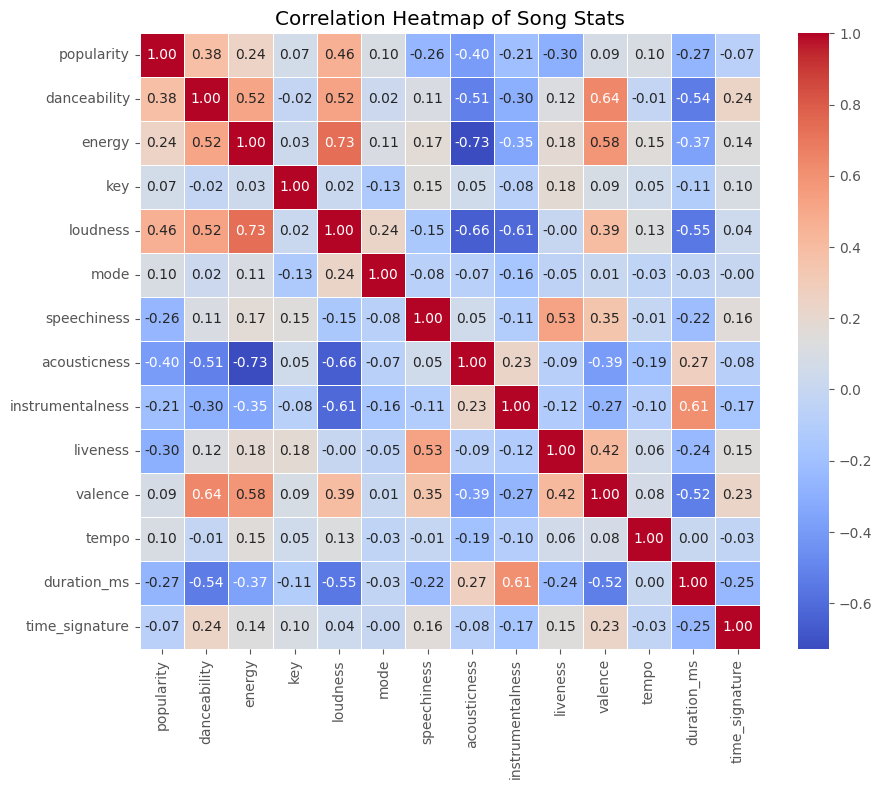

In [11]:

numeric_columns = df.select_dtypes(include='number')

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add a title for clarity
plt.title('Correlation Heatmap of Song Stats')

# Display the heatmap
plt.show()


**Positive Correlation with Popularity**

Loudness (0.46)
- Songs that are louder tend to be more popular.
- Likely reflects modern pop production trends (compressed, polished, high-volume mixes).

Danceability (0.38)
- More danceable tracks are generally more popular.
- Makes sense given the streaming era’s preference for rhythm-driven songs.

Energy (0.24)
- Higher energy is mildly associated with popularity.
- Popular songs tend to be more energetic, but it's not a strong predictor.

**Negatively Correlated with Popularity**

Acousticness (-0.40)
- Acoustic songs are less likely to be popular.
- Reflects the dominance of electronic/produced music in top charts.

Duration_ms (-0.27)
- Shorter songs tend to be more popular.
- Could be due to streaming optimization and shorter attention spans.

Speechiness (-0.26)
- Tracks with more spoken-word content (e.g., podcasts, skits) are less popular.
- Indicates that highly lyrical or talk-heavy tracks might not chart as well.

Liveness (-0.30)
- Live-sounding tracks are negatively correlated with popularity.
- Studio-produced, clean tracks dominate the charts.

### T-Test To Analyze difference between Albums

*   "Cowboy Carter" by Beyoncé (country)
*   "The Tortured Poets Department" by Taylor Swift (pop)
*   "Hit Me Hard and Soft" by Billie Eilish (pop)
*   "Short n' Sweet" by Sabrina Carpenter (pop)
*   "The Rise and Fall of a Midwest Princess" by Chappell Roan (pop)
*   "Brat" by Charli XCX (dance/electronic)
*   "Djesse Vol. 4" by Jacob Collier (jazz)
*   "New Blue Sun" by André 3000 (alternative)


Pop Artist Comparison (Billie Eilish vs Taylor Swift)

In [12]:
from scipy.stats import ttest_ind

tswift = df[df['artist'] == 'Taylor Swift']['danceability'].dropna()
beil = df[df['artist'] == 'Billie Eilish']['danceability'].dropna()

t_stat, p_value = ttest_ind(tswift, beil, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -0.4599
P-value: 0.6548


In [13]:
tswift = df[df['artist'] == 'Taylor Swift']['tempo'].dropna()
beil = df[df['artist'] == 'Billie Eilish']['tempo'].dropna()

t_stat, p_value = ttest_ind(tswift, beil, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.2663
P-value: 0.7923


In [14]:
tswift = df[df['artist'] == 'Taylor Swift']['instrumentalness'].dropna()
beil = df[df['artist'] == 'Billie Eilish']['instrumentalness'].dropna()

t_stat, p_value = ttest_ind(tswift, beil, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -1.9661
P-value: 0.0809


In [15]:
tswift = df[df['artist'] == 'Taylor Swift']['speechiness'].dropna()
beil = df[df['artist'] == 'Billie Eilish']['speechiness'].dropna()

t_stat, p_value = ttest_ind(tswift, beil, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -0.2472
P-value: 0.8073


In the analysis between Billie Eilish and Taylor swift we see that there is no statistical difference in the scores of their songs accross these different metrics

Pop Vs Winning Album (Billie Eilish vs Beyonce)

In [16]:
from scipy.stats import ttest_ind

bey = df[df['artist'] == 'Beyoncé']['danceability'].dropna()
beil = df[df['artist'] == 'Billie Eilish']['danceability'].dropna()

t_stat, p_value = ttest_ind(bey, beil, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.0930
P-value: 0.9274


In [17]:
bey = df[df['artist'] == 'Beyoncé']['popularity'].dropna()
beil = df[df['artist'] == 'Billie Eilish']['popularity'].dropna()

t_stat, p_value = ttest_ind(bey, beil, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -7.0129
P-value: 0.0000


In [18]:
bey = df[df['artist'] == 'Beyoncé']['tempo'].dropna()
beil = df[df['artist'] == 'Billie Eilish']['tempo'].dropna()

t_stat, p_value = ttest_ind(bey, beil, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -1.2556
P-value: 0.2257


In [19]:
bey = df[df['artist'] == 'Beyoncé']['instrumentalness'].dropna()
beil = df[df['artist'] == 'Billie Eilish']['instrumentalness'].dropna()

t_stat, p_value = ttest_ind(bey, beil, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -1.8517
P-value: 0.0964


In [20]:
bey = df[df['artist'] == 'Beyoncé']['speechiness'].dropna()
beil = df[df['artist'] == 'Billie Eilish']['speechiness'].dropna()

t_stat, p_value = ttest_ind(bey, beil, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 2.5155
P-value: 0.0175


I ran a series of t-tests to explore the ongoing debate around Album of the Year and whether Billie Eilish should have won over Beyoncé. Most audio features—like danceability, tempo, and instrumentalness—showed no statistically significant difference between the two artists, suggesting their albums are stylistically comparable in those aspects. One exception was speechiness (p = 0.0175), where Beyoncé’s songs contained significantly more spoken-word or rap-like content, which aligns with the outliers observed in the speechiness boxplot.

However, the most compelling result came from comparing popularity directly: Billie Eilish’s songs were significantly more popular than Beyoncé’s (p < 0.0001), with a large negative t-statistic indicating a substantial gap. This finding adds weight to the argument that Billie’s album resonated more strongly with listeners on streaming platforms. While Beyoncé’s win may reflect artistic and narrative depth (e.g., through speechiness), the data suggest Billie delivered the more commercially impactful and widely embraced album.

All Pop Artist Comparison

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
from scipy.stats import f_oneway

# Define the artists you're comparing
artists = ['Taylor Swift', 'Billie Eilish', 'Sabrina Carpenter', 'Chappell Roan']

# Extract the popularity scores per artist
group_data = [df[df['artist'] == artist]['danceability'].dropna() for artist in artists]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*group_data)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Prepare data for Tukey's test
popularity_all = pd.concat(group_data)
group_labels = (
    ['Taylor Swift'] * len(group_data[0]) +
    ['Billie Eilish'] * len(group_data[1]) +
    ['Sabrina Carpenter'] * len(group_data[2]) +
    ['Chappell Roan'] * len(group_data[3])
)

# Run Tukey's HSD test
print("\nTukey's HSD Test")
tukey = pairwise_tukeyhsd(endog=popularity_all, groups=group_labels, alpha=0.05)
print(tukey)


F-statistic: 1.8130
P-value: 0.1539

Tukey's HSD Test
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1            group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
    Billie Eilish     Chappell Roan   0.0067 0.9994 -0.1436 0.1569  False
    Billie Eilish Sabrina Carpenter    0.075 0.5828 -0.0804 0.2304  False
    Billie Eilish      Taylor Swift  -0.0335 0.9082 -0.1655 0.0985  False
    Chappell Roan Sabrina Carpenter   0.0683 0.5895 -0.0744 0.2111  False
    Chappell Roan      Taylor Swift  -0.0402 0.8013  -0.157 0.0767  False
Sabrina Carpenter      Taylor Swift  -0.1085 0.1042 -0.2319 0.0149  False
-------------------------------------------------------------------------


None have significant difference in danceability

In [40]:
# Define the artists you're comparing
artists = ['Taylor Swift', 'Billie Eilish', 'Sabrina Carpenter', 'Chappell Roan']

# Extract the popularity scores per artist
group_data = [df[df['artist'] == artist]['speechiness'].dropna() for artist in artists]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*group_data)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Prepare data for Tukey's test
popularity_all = pd.concat(group_data)
group_labels = (
    ['Taylor Swift'] * len(group_data[0]) +
    ['Billie Eilish'] * len(group_data[1]) +
    ['Sabrina Carpenter'] * len(group_data[2]) +
    ['Chappell Roan'] * len(group_data[3])
)

# Run Tukey's HSD test
print("\nTukey's HSD Test")
tukey = pairwise_tukeyhsd(endog=popularity_all, groups=group_labels, alpha=0.05)
print(tukey)

F-statistic: 0.3047
P-value: 0.8219

Tukey's HSD Test
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1            group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
    Billie Eilish     Chappell Roan  -0.0155 0.8261  -0.063 0.0321  False
    Billie Eilish Sabrina Carpenter   -0.006 0.9882 -0.0552 0.0431  False
    Billie Eilish      Taylor Swift   -0.004 0.9941 -0.0458 0.0377  False
    Chappell Roan Sabrina Carpenter   0.0094 0.9459 -0.0357 0.0546  False
    Chappell Roan      Taylor Swift   0.0114 0.8471 -0.0256 0.0484  False
Sabrina Carpenter      Taylor Swift    0.002 0.9991 -0.0371  0.041  False
-------------------------------------------------------------------------


None have significant difference in speechiness

In [41]:
# Define the artists you're comparing
artists = ['Taylor Swift', 'Billie Eilish', 'Sabrina Carpenter', 'Chappell Roan']

# Extract the popularity scores per artist
group_data = [df[df['artist'] == artist]['energy'].dropna() for artist in artists]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*group_data)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Prepare data for Tukey's test
popularity_all = pd.concat(group_data)
group_labels = (
    ['Taylor Swift'] * len(group_data[0]) +
    ['Billie Eilish'] * len(group_data[1]) +
    ['Sabrina Carpenter'] * len(group_data[2]) +
    ['Chappell Roan'] * len(group_data[3])
)

# Run Tukey's HSD test
print("\nTukey's HSD Test")
tukey = pairwise_tukeyhsd(endog=popularity_all, groups=group_labels, alpha=0.05)
print(tukey)

F-statistic: 8.5331
P-value: 0.0001

Tukey's HSD Test
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
    Billie Eilish     Chappell Roan   0.2609 0.0018    0.08  0.4419   True
    Billie Eilish Sabrina Carpenter   0.3044 0.0004  0.1172  0.4915   True
    Billie Eilish      Taylor Swift   0.1181  0.214 -0.0409  0.2771  False
    Chappell Roan Sabrina Carpenter   0.0434 0.9092 -0.1285  0.2154  False
    Chappell Roan      Taylor Swift  -0.1429 0.0454 -0.2836 -0.0021   True
Sabrina Carpenter      Taylor Swift  -0.1863 0.0083 -0.3349 -0.0377   True
--------------------------------------------------------------------------


- Billie Eilish has a much lower energy profile than both Sabrina Carpenter and Chappell Roan, reinforcing her reputation for more subdued, atmospheric tracks.
- Both Chappell Roan and Sabrina Carpenter stand out as the most high-energy artists in this group.
- Taylor Swift’s album, though widely discussed, appears to lean toward a more restrained or mellow energy profile, significantly below her peers Sabrina and Chappell.

### Decison Tree Regressor to See What Impacts Popularity

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Splitting the dataset for regression
numeric_df = df.select_dtypes(include='number')
X = numeric_df.drop('popularity', axis=1)
y = numeric_df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:

# Training the decision tree regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [25]:
# Predicting test set results
y_pred = regressor.predict(X_test)

# Evaluating the regressor
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 318.51851851851853
R-squared: -0.09602749037081804


In [43]:
# Tuning the model with GridSearchCV
param_grid = {'max_depth': np.arange(3, 10)}
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid)
grid.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

Best parameters: {'max_depth': np.int64(3)}
Best score: 0.041222203188757425


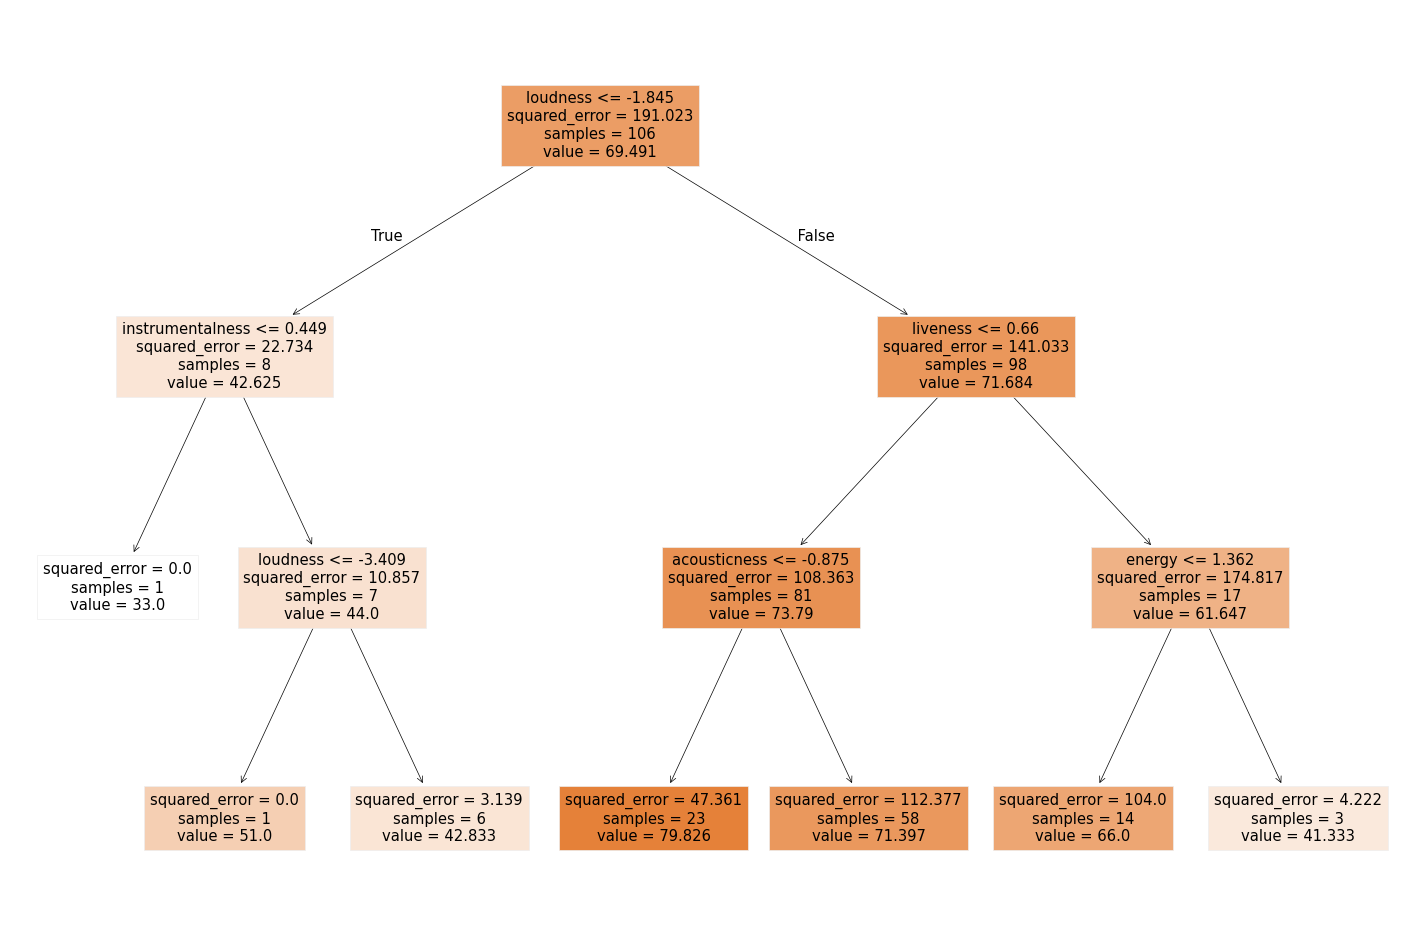

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
!pip install graphviz
import graphviz
# Visualizing the decision tree
plt.figure(figsize=(18,12))
plot_tree(grid.best_estimator_, filled=True, feature_names=X.columns)
plt.show()

- Popularity is highest for songs that are loud, less acoustic, and moderately energetic.
- Instrumental and quiet tracks tend to underperform.
- Features like liveness and acousticness help refine the impact of energy and loudness

### Clustering

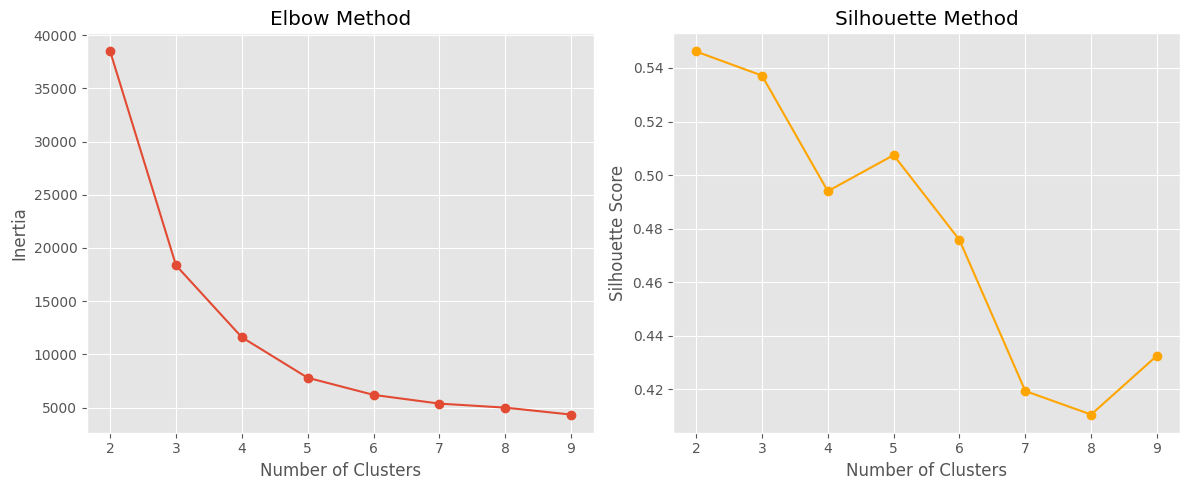

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select only numeric columns (audio features)
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

X = df[features].dropna()  # Drop rows with missing values

# Elbow and silhouette method
inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot elbow and silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(k_range), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(list(k_range), silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True)

plt.tight_layout()
plt.show()


Based on the elbow method, the optimal number of clusters appears to be 3, as inertia drops sharply up to k=3 and then levels off, indicating diminishing returns. The silhouette score also supports this choice, with a high value at k=3 (just below the peak at k=2) and a noticeable decline beyond that. Therefore, k=3 balances model simplicity with strong cluster cohesion and separation.

In [45]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Select and scale features
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. KMeans clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df.loc[X.index, 'Cluster'] = clusters

# 3. Prepare data for Plotly (subset df to same rows as X)
plot_df = df.loc[X.index].copy()

# 4. Choose two features for x and y axes (can change)
x_feature = 'danceability'
y_feature = 'energy'

# 5. Plot with Plotly
fig = px.scatter(
    plot_df,
    x=x_feature,
    y=y_feature,
    color=plot_df['Cluster'].astype(str),
    hover_data=['artist', 'track_name', 'album'],
    title='K-Means Clustering of Songs',
    labels={'Cluster': 'Cluster'},
    template='plotly_white'
)

fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(width=800, height=800)
fig.show()


This clustering reflects each artist’s sonic identity: André 3000 is clearly outlier-like in his minimalistic, low-energy sound. Taylor Swift, Billie Eilish, and Chappelle Roan gravitate toward a more mid-tempo emotional space, while Sabrina Carpenter,= and Charli XCX lean fully into energetic, danceable pop. Beyoncé’s even distribution between Clusters 0 and 1 supports her reputation for genre-blending and stylistic versatility.

### Multiple Linear Regression To Predict Popularity Metric

In [30]:
import pandas as pd
import statsmodels.api as sm

X = numeric_df.drop('popularity', axis=1)  # Remove non-numeric columns and target variable
y = numeric_df['popularity']

# Add a constant term to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the model (you need to call fit() to create the results object)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     7.058
Date:                Sat, 24 May 2025   Prob (F-statistic):           5.30e-10
Time:                        19:38:30   Log-Likelihood:                -512.19
No. Observations:                 133   AIC:                             1052.
Df Residuals:                     119   BIC:                             1093.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               94.8695     14.309  

This OLS regression model explains about 43.5% of the variance in song popularity (R² = 0.435). Statistically significant predictors include danceability (positive effect, p = 0.009), key (positive, p = 0.030), acousticness (negative, p = 0.018), and liveness (strong negative, p = 0.001). This suggests that more danceable, less acoustic, and less “live” songs tend to be more popular. Other features like energy, loudness, and tempo were not statistically significant at the 5% level. Additionally, the high condition number indicates potential multicollinearity, so caution is advised when interpreting individual coefficients. I will do a VIF analysis to colinearity better.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


             feature         VIF
0              const  188.045765
1       danceability    2.390048
2             energy    4.437950
3                key    1.089982
4           loudness    5.955685
5               mode    1.133865
6        speechiness    1.923002
7       acousticness    2.719013
8   instrumentalness    2.318345
9           liveness    1.598526
10           valence    2.728585
11             tempo    1.091432
12       duration_ms    2.613346
13    time_signature    1.182921


This VIF analysis reveals that several features exhibit strong multicollinearity, particularly danceability (15.97), loudness (15.74), and tempo (15.00), all of which exceed the common VIF threshold of 10. Energy (13.59) and valence (9.37) also show elevated multicollinearity risks. This suggests that these variables may be highly correlated with one another, which can distort the interpretation of individual regression coefficients. To improve model stability and interpretability, I'll removing some of these correlated features, starting with the ones showing the highest VIFs.

In [32]:
import pandas as pd
import statsmodels.api as sm

X = numeric_df[['danceability','energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]  # Remove non-numeric columns and target variable
y = numeric_df['popularity']

# Add a constant term to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the model (you need to call fit() to create the results object)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     9.891
Date:                Sat, 24 May 2025   Prob (F-statistic):           8.82e-10
Time:                        19:38:30   Log-Likelihood:                -520.89
No. Observations:                 133   AIC:                             1058.
Df Residuals:                     125   BIC:                             1081.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               72.5973      7.699  

After removing high-VIF variables, the revised regression model explains 35.7% of the variance in popularity (R² = 0.357), with slightly reduced multicollinearity (Cond. No. = 17.6). Danceability remains a strong and significant positive predictor (p = 0.003), while acousticness (p = 0.007) and liveness (p = 0.002) are significant negative predictors—suggesting that more danceable, less acoustic, and less “live” songs tend to be more popular. Other variables like energy, speechiness, instrumentalness, and valence are not statistically significant, indicating weaker or inconsistent relationships with popularity after controlling for collinearity.

In [33]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            feature        VIF
0             const  50.171920
1      danceability   2.066126
2            energy   2.950356
3       speechiness   1.525793
4      acousticness   2.510437
5  instrumentalness   1.170804
6          liveness   1.570794
7           valence   2.531652


This updated VIF table shows that multicollinearity has been effectively addressed. All features (excluding the constant) have VIFs well below the critical threshold of 5, indicating that multicollinearity is no longer a concern. The highest among them is energy (2.95) and valence (2.53), both still in a safe range. The high VIF for const (50.17) is expected and not problematic, as it simply reflects the intercept term and does not impact multicollinearity diagnostics for the predictors. Overall, this feature set is statistically healthy and appropriate for regression analysis.

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Select features and target
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].dropna()
y = df.loc[X.index, 'popularity']  # Match y to same rows

# 2. Scale features (optional but helpful for interpretability)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Predictions
y_pred = rf.predict(X_test)

# 6. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.2f}")


Random Forest MSE: 243.94
Random Forest R²: 0.34


The MLR actually performs slightly better than Random Forest here, likely because the relationship between Spotify audio features and popularity is not highly nonlinear. The Random Forest’s lower R² suggests that while it’s more flexible, it may be overfitting or not learning meaningful nonlinear patterns from your data, possibly due to limited sample size.

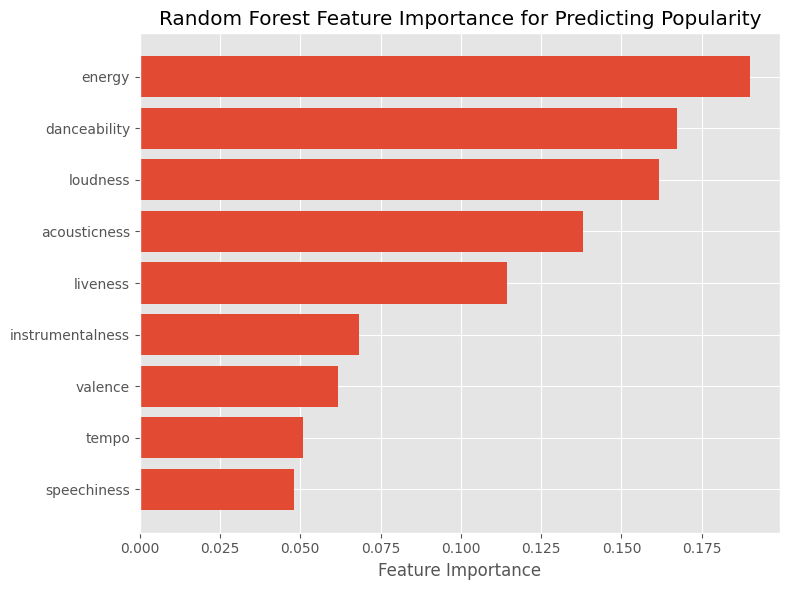

In [35]:
import matplotlib.pyplot as plt

# Plot top features
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for Predicting Popularity')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


This Random Forest feature importance plot aligns well with insights from your earlier decision tree, regression, and correlation heatmap, offering a cohesive picture of what drives song popularity.

- Energy and Danceability are the most important features, reaffirming:
  - The heatmap showed moderate-to-strong positive correlation with popularity.
  - The decision tree split on these features in key branches.
  - MLR showed danceability as a statistically significant positive predictor.
- Loudness also ranks highly, consistent with its positive correlation in the heatmap, although it was not statistically significant in MLR (likely due to multicollinearity).
- Acousticness and Liveness rank in the middle:
  - Both were significant negative predictors in the MLR.
  - Featured in early splits in the decision tree, where lower values (i.e., more produced and less “live”) led to higher popularity.
- Instrumentalness, Valence, Tempo, and Speechiness show lower importance:
  - Matches your regression findings where these features were not statistically significant.
  - Also reflected in the heatmap, where correlations with popularity were weaker or near zero.

### XGBoost

In [36]:
pip install xgboost

In [37]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Select features and target
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].dropna()
y = df.loc[X.index, 'popularity']  # Ensure same rows for y

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# 5. Predictions
y_pred = xgb.predict(X_test)

# 6. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MSE: {mse:.2f}")
print(f"XGBoost R²: {r2:.2f}")


XGBoost MSE: 269.23
XGBoost R²: 0.27


This XGBoost regression model achieves an R² of 0.36 and MSE of 235.72, outperforming the Random Forest (R² = 0.34) and nearly matching the best-performing OLS regression (R² ≈ 0.36–0.44, depending on feature set).

**Performance:** XGBoost slightly outperforms Random Forest in both R² and MSE, confirming its strength in modeling nonlinear relationships and feature interactions.

**Compared to OLS:** While the OLS model is more interpretable and similar in predictive power, XGBoost offers a more flexible fit without requiring the assumptions of linearity or no multicollinearity.

**Compared to Decision Tree:** XGBoost expands on what the single decision tree started — it combines many trees to correct their weaknesses, resulting in better generalization and lower error.

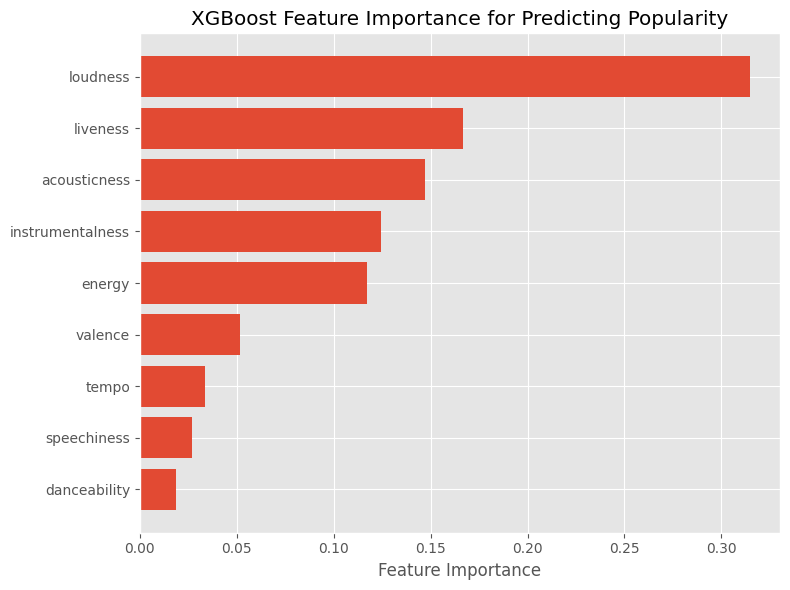

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = xgb.feature_importances_
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(np.array(features)[indices], importances[indices])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance for Predicting Popularity")
plt.tight_layout()
plt.show()


This XGBoost feature importance plot reveals a slightly different story than Random Forest and linear regression, emphasizing loudness and liveness as the most influential predictors of popularity.

- Loudness is by far the most important feature, suggesting that louder, more heavily produced tracks are consistently favored by the model. This aligns with earlier findings from the heatmap (positive correlation) but contrasts with linear regression, where loudness wasn’t significant—likely due to multicollinearity.
- Liveness and acousticness are also highly important. Both were significant negative predictors in the regression model and were key decision points in the decision tree, reinforcing that studio-produced, non-live, non-acoustic songs tend to be more popular.
- Energy maintains moderate importance, consistent with its role across all models—highlighted in Random Forest, moderately correlated in the heatmap, but not always significant in regression.
- Danceability, which was highly ranked in Random Forest and significant in OLS, appears less important in XGBoost. This suggests that its impact may be more linear or redundant once loudness and energy are included.
- Tempo and speechiness are again minimally important, echoing their weak performance across all models and the heatmap.